<a href="https://colab.research.google.com/github/kristinaamalia/Pemrograman_Python/blob/main/TUBES_SKO_Kristina_Amalia_1101184327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kristina Amalia 
1101184327
TT-42-02

Sistem Perancangan FTTB yang akan saya buat pada sebuah gedung dengan 32 lantai. Terdapat 1 buah ODC dan 1 buat ODP dengan kapasitas 1:4 dan 1:8. Jarak STO Tebet ke gedung Apartemen Taman Rasuna adalah 5km. Jarak ODC ke ODP lantai 32 adalah 160 meter dan jarak ODP ke ONU adalah 15 meter. Jumlah konektor yang digunakan ada 12 dengan loss 0.25 dB dan jumlah splicing 6 dengan redaman 0.1

In [15]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Untuk SNR
Bw = 2*10**9 #Bandwidth fiber optik 
SM = 3 #Safety margin (dB)
Suhu = 290 #Kelvin
Rl = 50 #Ekivalen resistansi
M = -0.23 #Tambahan daya sinyal APD (dB)
R = 0.85 #Responsivitas (A/W)
q = 1.6*10**-19 #Elektron (C)
id = 2*10**-7 #Arus gelap (A)
F = 1 #Faktor gain
K = 1.38*10**-23 #Konstanta Boltzman

In [17]:
#Untuk Daya Terima

#jarak sentral ke ODC = 5 km
#jarak ODC ke ODP = 160 m
#jarak ODP ke ONU = 15 m
#jarak total = 5000 + 160 + 15 = 5.175 km

In [18]:
d = np.arange(0.015,5.176,1) #jarak (km)
Ns1 = 1 #1:4 ODC
Ns2 = 1 #1:8 ODP
As1 = 7.25 #Loss Splitter 1:4 (dB)
As2 = 10.38 #Loss Splitter 1:8 (dB)
Asp = 0.1 #Redaman Splicing 
Nsp = 6 #Jumlah Splicing
Nc = 12 #Jumlah Konektor
Ac = 0.25 #Loss Konektor SC/UPC
Afo = 0.3 #Redaman Fiber Optik G.652(1310/1490) (dB/km)
Ptx = 8 #Daya kirim (mW) 

In [27]:
#Daya Terima
def prx():
  Loss_kabel = d * Afo
  Loss_splitter = (Ns1*As1) + (Ns2*As2)
  Loss_konektor = Nc * Ac
  Loss_splicing = Nsp * Asp
  ptx_db = 10*np.log10(Ptx) #konversi mW ke dB

  atotal = Loss_kabel + Loss_splitter + Loss_konektor + Loss_splicing
  Prx = ptx_db - atotal - SM
  return Prx

Prx = prx()
print ('Daya Terima = ', Prx, 'dB')

Daya Terima =  [-15.20360013 -15.50360013 -15.80360013 -16.10360013 -16.40360013
 -16.70360013] dB


In [20]:
#SNR 
def SNR():
  prx_w = 10**((Prx-30)/10) #konversi db ke w
  A = 2*((prx_w*R)**2)

  signalpower = 2*A

  shotnoise = 2*q*A*Bw*F

  idark = 2*q*id*Bw

  amplifiernoise = (4*K*Suhu*Bw)/Rl
  
  Noise = signalpower/(shotnoise+amplifiernoise+idark)
  noise_db = 10*np.log10(Noise)
  return noise_db

noise_db = SNR()
print ('S/N = ', noise_db, 'dB')

S/N =  [36.13693372 35.53693446 34.9369351  34.33693566 33.73693614 33.13693657] dB


In [21]:
#CARI Q
def Q():
  hasilQ = 0.5*(10**(noise_db/20))
  return hasilQ

cariQ = Q()
print(cariQ)  

[32.04916288 29.91002163 27.91365839 26.05054342 24.31178305 22.6890772 ]


In [22]:
def BER():
  phi = 3.14
  hasilBER = (1/np.sqrt(2*phi))*(np.exp(-(cariQ**2/2))/cariQ)
  return hasilBER
cariBER = BER()
print(cariBER)  

[1.12892869e-225 7.29863718e-197 9.12184914e-172 6.64346794e-150
 7.37137019e-131 2.87778235e-114]


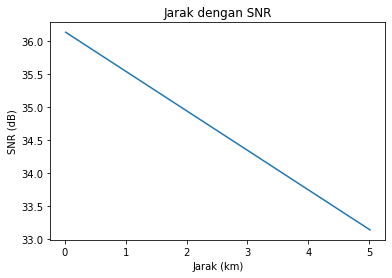

In [23]:
plt.figure()
plt.plot(d,noise_db)
plt.title('Jarak dengan SNR')
plt.xlabel('Jarak (km)')
plt.ylabel('SNR (dB)')
plt.show()

Analisis Perbandingan Jarak dengan SNR : nilai SNR tertinggi pada saat O km dan nilai SNR terendah pada saat 5 km, yang berarti semakin jauh jarak maka nilai SNR akan menurun

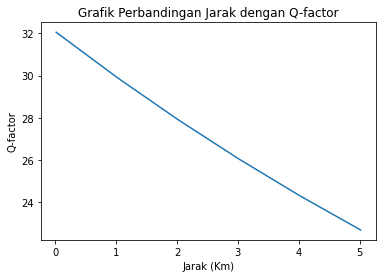

In [24]:
plt.figure()
plt.plot(d,cariQ,)
plt.title('Grafik Perbandingan Jarak dengan Q-factor')
plt.xlabel('Jarak (Km)')
plt.ylabel('Q-factor')
plt.show()

Analisis Perbandingan Jarak dengan Q-factor : Semakin jauh jarak maka nilai Q-factor akan menurun

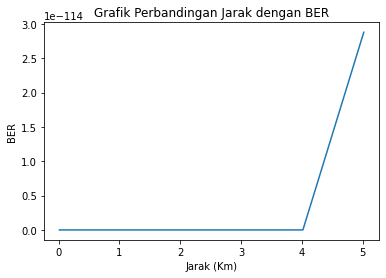

In [25]:
  plt.figure()
  plt.plot(d,cariBER)
  plt.title('Grafik Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

Pada grafik terlihat bahwa pada jarak 0 hingga 4 km BER masih bernilai 0 atau mendekati 0 yang berarti masih terbilang cukup baik, lalu setelah melewati 4km nilai BER menjadi 2.8x10^(-114)
 

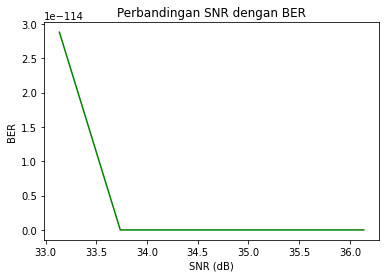

In [26]:
  plt.figure()
  plt.plot(noise_db,cariBER,'g')
  plt.title('Perbandingan SNR dengan BER')
  plt.xlabel('SNR (dB)')
  plt.ylabel('BER')
  plt.show()

Analisis Perbandingan SNR dengan BER : Parameter yang mempengaruhi grafik diatas adalah LPB. Pada perancangan ini LPB yang di dapatkan adalah -16.7 hingga -15.2 hasil tersebut membuktikan bahwa jaringan layak karena lebih besar dari -18. Sedangkan nilai SNR yang dihasilkan yaitu 33 sampai 36 dB yang menunjukkan bahwa jaringan layak dengan nilai BER menghasilkan 1x10^(-225) sampai 2.8x10^(-114) . Dari grafik diatas juga terlihat bahwa nilai BER mendekati nol saat SNR 33.75 dB 